# <font color=#023F7C> **Machine Learning, Explainability and Deep Learning** </font>

<font color=#023F7C>**Hi! PARIS DataBootcamp 2024 🚀**</font> <br>


<img src = https://www.hi-paris.fr/wp-content/uploads/2020/09/logo-hi-paris-retina.png width = "300" height = "200" >


**Name**: Tristan Waddington           <br>
**School**: IPP         <br>
**Group number**: 1    <br>
**Track**: Intermediate

# **1. Important guidelines**


**<font size='5'><u>Goal of this practical session</u>**</font> <br>
Your goal is to build a Machine Learning model that can **predict whether a professional tennis player will win a match or not**. <br>

To achieve this goal, you were provided a dataset called `tennis_matches.csv` with 21 variables and around 28000 rows/players. <br>
The dataset contains some characteristics for each player (height, age, ranking, hand...) as well as match statistics (number of aces, who won the first set, ...). <br>
You have access to a pdf file called `dataset_tennis_prediction_DB2024.pdf` which contains a description of each variable.

The variable to predict is `won`, which is equal to 1 if the player won the match and 0 if the player didn't.

**<font size='5'><u>How to work on this notebook</u>**</font> <br>
The notebook is split in three parts: Machine Learning, Explainability and Deep Learning.

- **Beginner track**: You only have to complete the Machine Learning section.
- **Intermediate track**: Please complete Machine Learning and Explainability (Deep Learning is optional)

**<font size='5'><u>Bootcamp deliverables</u>**</font> <br>

Here are the two deadlines for the bootcamp deliverables:
- <u>**Friday 12:30 PM**</u>: <br> Send us the "Data visualisation" and "Machine Learning, Explainability and Deep Learning" notebooks (no need to send us data cleaning) <br>
    - **Each group member should send his own notebooks** (we won't accept one notebook per group)
    - Don't forget to complete the start of the notebook with your information (name, school, group number and track)
    
- <u>**Friday 2:30PM**</u>: <br>Send us the group slides <br>
    - You can send us a single powerpoint per group (no need to send us one per group member)
    - Don't forget to add your group number as well as who is in your group (name, school and track) to the slides

Send both the notebooks and the slides at `data-event@hi-paris.fr`

**<font size='5'><u>Need help ? 🙏</u>**</font> <br>

We will drop later in the week to the Machine Learning course (Beginner track) on HFactory the `Machine_Learning_Beginner_DB2024.ipynb` notebook for those who need help with the Machine Learning part.

**Don't hesitate to ask questions to the bootcamp organizers/staff members if you need help.**


# **2. Machine Learning**

Let's start by importing the libraries we used in two previous notebooks.

In [1]:
import pandas as pd

pd.set_option("display.max_columns", None)  # Show all columns

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Now load the `tennis_matches.csv` dataset using `pd.read_csv()`

In [2]:
path = r"data/tennis_matches.csv"
# path = r"~/hfactory_magic_folders/course/data/tennis_matches.csv"
matches = pd.read_csv(path)
matches.head()

,hand,age,ace,df,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced,rank,rank_points,won,surface,draw_size,tourney_level,tourney_date,best_of,round,minutes
0,R,23.7,10.0,9.0,104.0,64.0,41.0,24.0,15.0,6.0,10.0,172.0,389.0,0,Hard,128,G,2021,5,R64,124.0
1,R,21.7,3.0,7.0,109.0,60.0,40.0,20.0,14.0,9.0,12.0,54.0,945.0,0,Grass,32,A,2018,3,R16,131.0
2,R,29.1,7.0,4.0,97.0,55.0,43.0,17.0,14.0,8.0,11.0,10.0,2555.0,0,Hard,32,A,2020,3,SF,141.0
3,R,28.8,5.0,4.0,91.0,62.0,40.0,13.0,16.0,1.0,6.0,37.0,1103.0,0,Clay,32,A,2022,3,QF,145.0
4,L,22.7,3.0,11.0,104.0,65.0,50.0,18.0,15.0,3.0,5.0,14.0,2593.0,1,Hard,128,G,2022,5,R16,141.0


In [3]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27893 entries, 0 to 27892
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hand           27893 non-null  object 
 1   age            27893 non-null  float64
 2   ace            27893 non-null  float64
 3   df             27893 non-null  float64
 4   svpt           27893 non-null  float64
 5   1stIn          27893 non-null  float64
 6   1stWon         27893 non-null  float64
 7   2ndWon         27893 non-null  float64
 8   SvGms          27893 non-null  float64
 9   bpSaved        27893 non-null  float64
 10  bpFaced        27893 non-null  float64
 11  rank           27893 non-null  float64
 12  rank_points    27893 non-null  float64
 13  won            27893 non-null  int64  
 14  surface        27893 non-null  object 
 15  draw_size      27893 non-null  int64  
 16  tourney_level  27893 non-null  object 
 17  tourney_date   27893 non-null  int64  
 18  best_o

### **2.1 Exploratory Data Analysis**



We will start by creating two lists with the continuous and categorical variables of our dataset. <br>
Note that we are not including `won` in both lists since we shouldn't apply data preprocessing to it

In [4]:
# List of continuous variables
continuous_var = list(matches.select_dtypes(include=[int, float]).columns)
continuous_var.remove("won")
print(f"{continuous_var=}")
# List of categorical variables
categorical_var = list(matches.select_dtypes(include=["object"]).columns)
print(f"{categorical_var=}")

continuous_var=['age', 'ace', 'df', 'svpt', '1stIn', '1stWon', '2ndWon', 'SvGms', 'bpSaved', 'bpFaced', 'rank', 'rank_points', 'draw_size', 'tourney_date', 'best_of', 'minutes']
categorical_var=['hand', 'surface', 'tourney_level', 'round']


**<u>Question 1:</u>** <br>
**Compute the correlation matrix of the continuous variables in the dataset with `.corr()`** <br>
**Then plot the heatmap of the correlation matrix using `sns.heatmap()`.**

**Did you notice any strongly correlated variables ?**

*<u>Help</u>: Use `annot=True` in `sns.heatmap()` to show the correlation coefficients.* <br>

In [5]:
matches[continuous_var].corr()

,age,ace,df,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced,rank,rank_points,draw_size,tourney_date,best_of,minutes
age,1.000000,0.036933,-0.010502,0.008810,-0.003148,0.008155,0.023273,0.013611,-0.002354,-0.004851,-0.106204,0.073774,0.039571,-0.061142,0.025766,0.008936
ace,0.036933,1.000000,0.236955,0.396075,0.384206,0.539365,0.353316,0.461027,0.029844,-0.064907,-0.101930,0.090473,0.166426,-0.036021,0.238564,0.339034
df,-0.010502,0.236955,1.000000,0.439800,0.314248,0.316142,0.358070,0.387704,0.310666,0.357553,0.035287,-0.047711,0.191173,-0.046024,0.239321,0.368010
svpt,0.008810,0.396075,0.439800,1.000000,0.948219,0.903000,0.789198,0.939069,0.572540,0.575460,-0.001419,-0.015469,0.380051,-0.026932,0.539316,0.916996
1stIn,-0.003148,0.384206,0.314248,0.948219,1.000000,0.945490,0.618397,0.900934,0.519787,0.509442,-0.012756,0.013367,0.352217,0.002486,0.513753,0.872407
1stWon,0.008155,0.539365,0.316142,0.903000,0.945490,1.000000,0.630757,0.906431,0.385097,0.308520,-0.060088,0.069425,0.338087,-0.008069,0.492928,0.838566
2ndWon,0.023273,0.353316,0.358070,0.789198,0.618397,0.630757,1.000000,0.782013,0.366545,0.308005,-0.026841,0.003589,0.316004,-0.067477,0.427390,0.745172
SvGms,0.013611,0.461027,0.387704,0.939069,0.900934,0.906431,0.782013,1.000000,0.379990,0.406292,-0.031165,0.031182,0.422933,-0.029048,0.595988,0.904794
bpSaved,-0.002354,0.029844,0.310666,0.572540,0.519787,0.385097,0.366545,0.379990,1.000000,0.919732,0.058937,-0.089028,0.177194,-0.004698,0.251188,0.460826
bpFaced,-0.004851,-0.064907,0.357553,0.575460,0.509442,0.308520,0.308005,0.406292,0.919732,1.000000,0.101906,-0.137135,0.217743,-0.003651,0.304909,0.483176


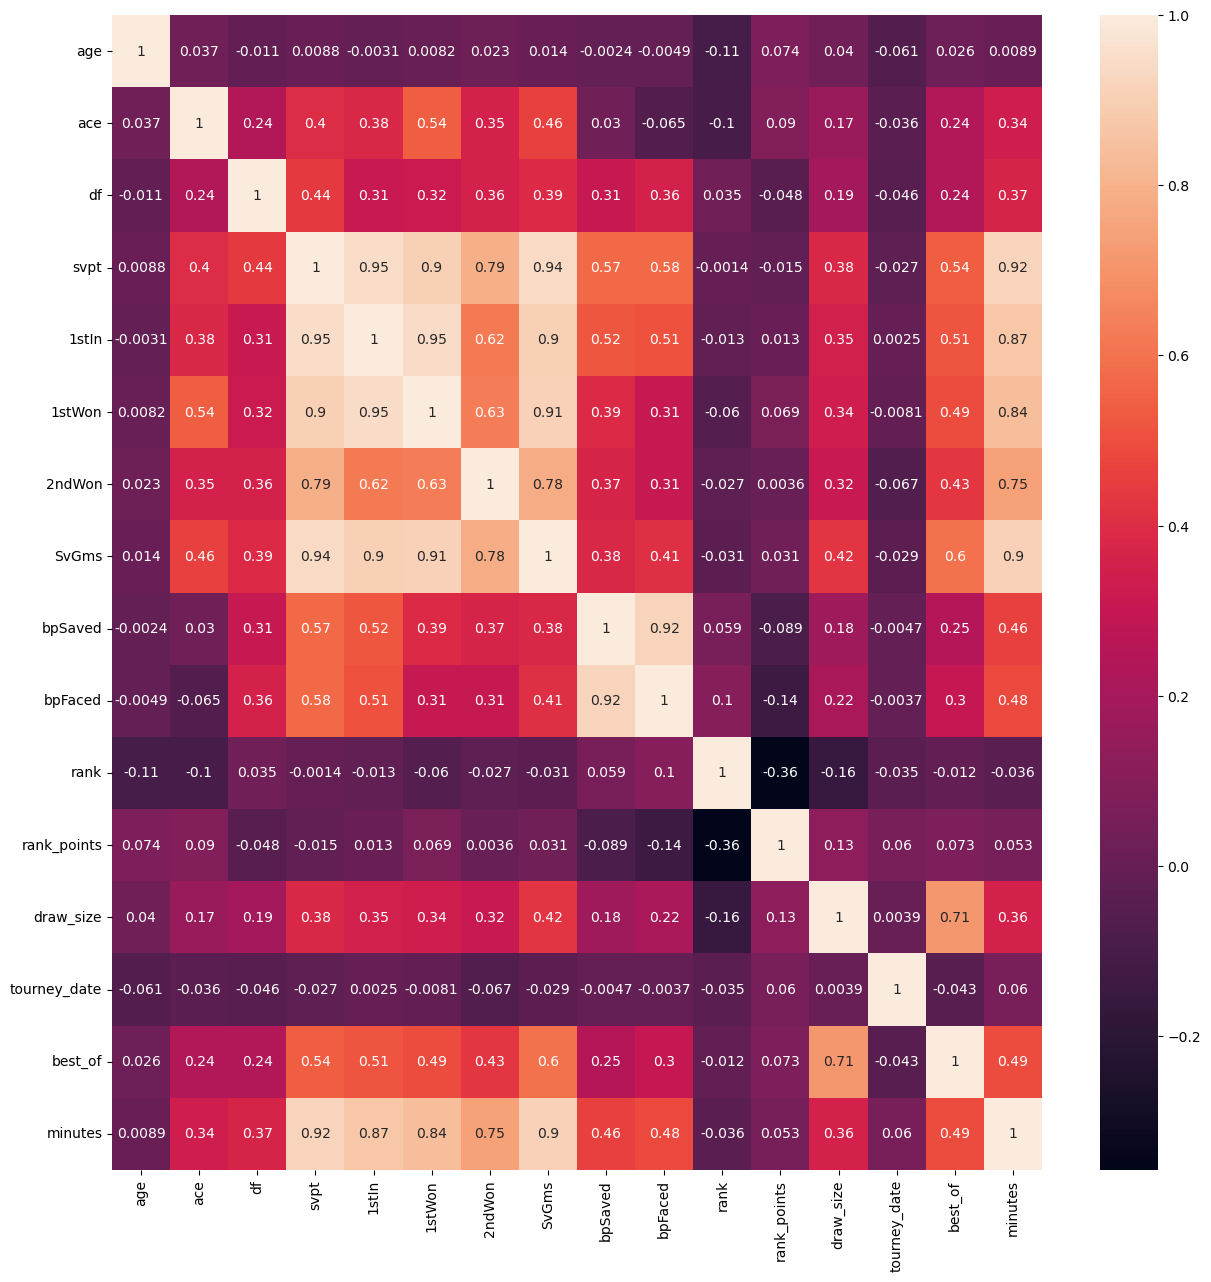

In [6]:
plt.figure(figsize=(15, 15))
sns.heatmap(data=matches[continuous_var].corr(), annot=True)
plt.show()

The variables `svpt`, `1stIn`, `1stWon`, `SvGms`and `minutes`are highly correlated, more than 90%.

**<u>Question 2:</u>** <br>
**Create a plot that shows the frequency of each target class (0 and 1) in the dataset using `sns.barplot`** <br>
**Are both classes in the same proportion in the dataset ?**

*Help: Build a dataframe by applying `.value_counts()` to the `won` variable, then use it to make a plot.*

In [7]:
matches["won"].value_counts()

won
0    14893
1    13000
Name: count, dtype: int64

<Axes: xlabel='won', ylabel='count'>

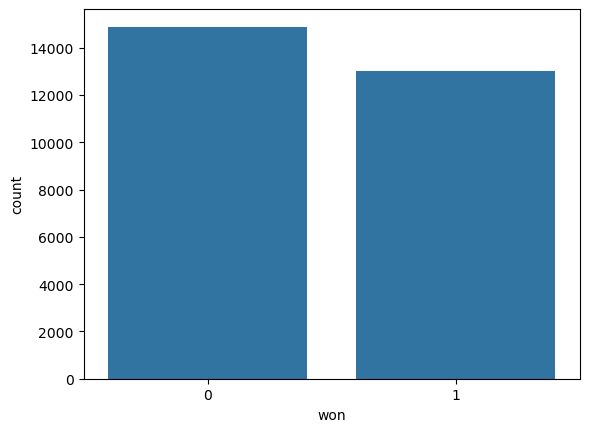

In [8]:
sns.barplot(matches["won"].value_counts())

The proportion of target variable is close, so we should be use it.

**You can create more plots/explore the data further if you wish to do so !**

<Axes: xlabel='1stWon', ylabel='Density'>

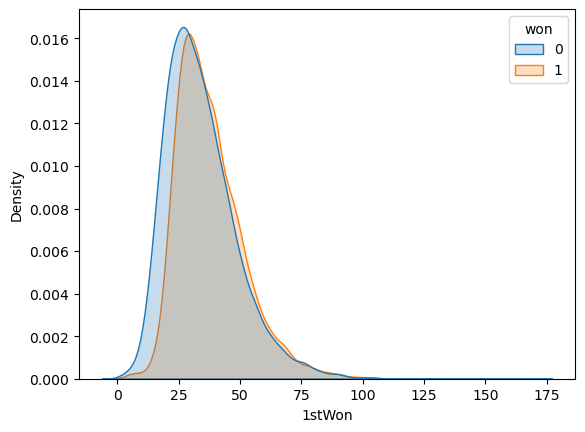

In [9]:
sns.kdeplot(data=matches, x="1stWon", hue="won", fill="won")

<Axes: xlabel='age', ylabel='Density'>

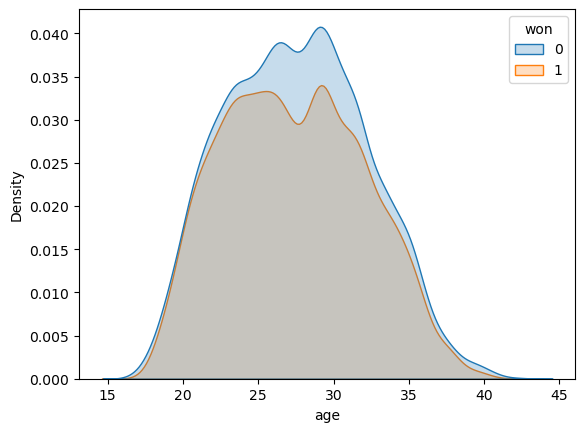

In [10]:
sns.kdeplot(data=matches, x="age", hue="won", fill="won")

<Axes: xlabel='ace', ylabel='Density'>

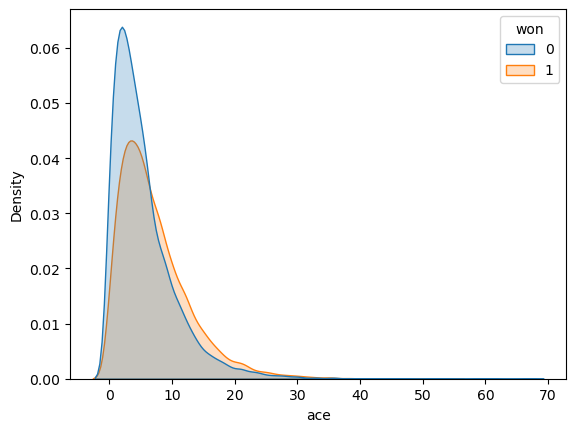

In [11]:
sns.kdeplot(data=matches, x="ace", hue="won", fill="won")

<Axes: xlabel='rank', ylabel='Density'>

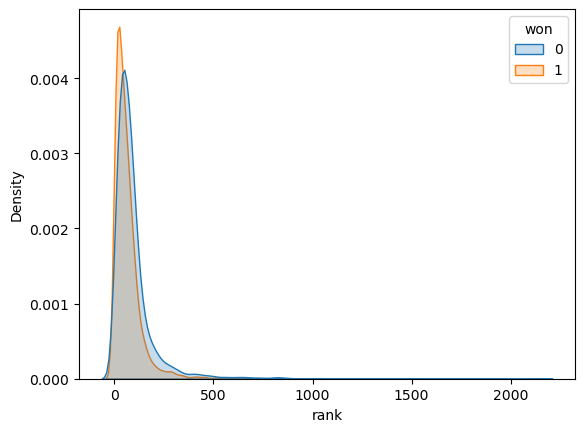

In [12]:
sns.kdeplot(data=matches, x="rank", hue="won", fill="won")

### **2.2 Data preprocessing**

In [13]:
# Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler


**<u>Question 3:</u>** <br>**Split the dataset into a train and test set with `train_test_split`** <br>
- Don't forget to first seperate the feature variables (X) and the target variable (y)
- Use `stratify=y` to make sure each split has the same proportion of target classes.

*Help: The target variable is the variable you wish to predict*


In [14]:
X, y = matches.drop(columns=["won"]), matches["won"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=1
)

**<u>Question 4:</u>** <br>**Transform the categorical variables in each split with `OneHotEncoder`.** <br>
**Then, build a dataframe with the onehotencoded variables and their corresponding variables names <u>for each split.</u>** <br>

The column names OneHotEncoder creates can be accessed with `.get_feature_names_out()`. <br>
Go this [page](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) for more info on how to use scikit-learn's `OneHotEncoder` function. <br>

*Don't forget, data preprocessing is only applied to the feature variables in the case of binary classification !*


In [15]:
for col in categorical_var:
    print(col, X_train[col].nunique())

hand 3
surface 4
tourney_level 5
round 8


In [16]:
onehot_encoder = OneHotEncoder(sparse_output=False)
onehot_encoder.fit(X_train[categorical_var])
X_train_cat = onehot_encoder.transform(X_train[categorical_var])
X_test_cat = onehot_encoder.transform(X_test[categorical_var])

In [17]:
onehot_encoder.get_feature_names_out()

array(['hand_L', 'hand_R', 'hand_U', 'surface_Carpet', 'surface_Clay',
       'surface_Grass', 'surface_Hard', 'tourney_level_A',
       'tourney_level_D', 'tourney_level_F', 'tourney_level_G',
       'tourney_level_M', 'round_F', 'round_QF', 'round_R128',
       'round_R16', 'round_R32', 'round_R64', 'round_RR', 'round_SF'],
      dtype=object)

In [18]:
onehot_features = onehot_encoder.get_feature_names_out()
X_train_cat = pd.DataFrame(X_train_cat, columns=onehot_features)
X_test_cat = pd.DataFrame(X_test_cat, columns=onehot_features)
X_train_cat

,hand_L,hand_R,hand_U,surface_Carpet,surface_Clay,surface_Grass,surface_Hard,tourney_level_A,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22309,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
22310,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
22311,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
22312,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**<u>Question 5</u>**: <br>
**Scale the continuous variables using either `StandardScaler` (standardization) or `MinMaxScaler` (normalization) for each split.**<br>
**Then, build a dataframe with the scaled variables and their corresponding variables names for each split.** <br>




In [19]:
# Apply standard scaler on X_train and X_test separatly
std_scaler = StandardScaler()

X_train_cont = std_scaler.fit_transform(X_train[continuous_var])
X_test_cont = std_scaler.transform(X_test[continuous_var])

X_train_cont

array([[ 1.57790929, -0.59350574, -0.84225371, ..., -0.78623458,
        -0.49833289, -0.86693026],
       [ 0.09487506,  0.84111121, -0.02895777, ...,  0.33881598,
        -0.49833289,  0.67881562],
       [-0.37797643, -0.05552438, -0.43560574, ..., -0.2237093 ,
         2.00669077,  0.49145248],
       ...,
       [ 2.15822703, -0.05552438, -1.24890168, ...,  1.46386654,
        -0.49833289,  0.35093013],
       [ 0.7181793 ,  1.19976544, -0.43560574, ..., -0.78623458,
        -0.49833289, -0.93719144],
       [ 1.81433504,  1.91707391,  0.78433817, ...,  0.90134126,
        -0.49833289,  1.10038268]])

In [20]:
# Build dataframes from the scaled variables
X_train_cont = pd.DataFrame(X_train_cont, columns=continuous_var)
X_test_cont = pd.DataFrame(X_test_cont, columns=continuous_var)

X_train_cont

,age,ace,df,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced,rank,rank_points,draw_size,tourney_date,best_of,minutes
0,1.577909,-0.593506,-0.842254,-1.372650,-1.203821,-1.313966,-0.522596,-1.101201,-1.283195,-1.323641,-0.136650,-0.411463,-0.673564,-0.786235,-0.498333,-0.866930
1,0.094875,0.841111,-0.028958,0.196971,-0.528266,-0.332800,1.639530,0.546913,1.162337,0.908233,-0.019066,-0.396076,-0.673564,0.338816,-0.498333,0.678816
2,-0.377976,-0.055524,-0.435606,0.538193,0.407119,0.718450,1.495388,1.253248,-0.060429,-0.207704,-0.050422,-0.465911,1.628614,-0.223709,2.006691,0.491452
3,-0.292003,-0.772833,-1.248902,-0.348984,0.199256,-0.402883,-0.666738,0.076023,-0.366120,0.238671,0.035806,-0.513849,-0.673564,-0.223709,-0.498333,-0.117478
4,-0.463949,-0.055524,-0.028958,0.845293,0.043358,-0.122550,2.071955,1.017803,0.245263,0.461858,-0.442368,-0.084186,1.628614,-0.223709,2.006691,0.304089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22309,-0.721868,0.482457,-0.842254,0.026360,0.251222,0.508200,0.774679,0.546913,-0.366120,-0.877267,-0.073939,-0.444014,-0.673564,-0.223709,-0.498333,0.210408
22310,1.040578,0.303130,-1.248902,-1.406772,-1.463650,-1.243883,-0.378454,-1.101201,-0.977503,-1.100454,-0.654018,4.961093,-0.673564,-0.223709,-0.498333,-1.475860
22311,2.158227,-0.055524,-1.248902,0.401704,1.134641,1.068866,-0.955021,-0.159422,2.385103,1.577795,0.858892,-0.713292,-0.673564,1.463867,-0.498333,0.350930
22312,0.718179,1.199765,-0.435606,-1.031428,-1.203821,-0.823383,-0.090171,-0.630312,-1.283195,-1.323641,-0.411012,-0.125614,0.093828,-0.786235,-0.498333,-0.937191


<u>**Question 6**</u>: <br>
**Merge the dataframes with the onehotencoded variable and the scaled variables for each split.<br>**
To merge two dataframes together, use `pd.concat([dataframe1, dataframe2],axis=1)`

In [21]:
## MERGE CATEGORICAL AND CONTINUOUS VARIABLES
X_train = pd.concat([X_train_cont, X_train_cat], axis=1)
X_test = pd.concat([X_test_cont, X_test_cat], axis=1)

In [22]:
X_test.head()

,age,ace,df,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced,rank,rank_points,draw_size,tourney_date,best_of,minutes,hand_L,hand_R,hand_U,surface_Carpet,surface_Clay,surface_Grass,surface_Hard,tourney_level_A,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
0,-1.431146,1.917074,1.190986,2.449036,1.862162,1.769699,3.513372,2.901362,0.550954,1.131421,-0.512918,0.583389,1.628614,0.901341,2.006691,3.020855,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.642389,0.303130,-0.842254,0.128727,0.355153,0.227867,-0.810879,-0.159422,-0.060429,0.015483,0.278812,-0.591969,-0.673564,-1.348760,-0.498333,0.186987,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.979787,0.123803,1.190986,1.527736,1.446436,1.138950,0.630538,1.488693,0.245263,1.131421,-0.379656,-0.140409,1.628614,1.463867,2.006691,1.264325,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.377976,-0.055524,0.784338,0.742926,0.407119,0.648366,1.062963,1.017803,-0.671812,-0.430892,-0.215039,-0.230366,-0.673564,0.901341,-0.498333,0.678816,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.911619,4.786308,0.377690,4.155145,4.824214,4.923448,2.936805,4.314031,2.690795,2.024170,-0.512918,0.217643,1.628614,-1.348760,2.006691,3.208218,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### **2.3 Model training and evaluation**
Now that our dataset has been preprocessed, we can use it train Machine Learning models.





In [23]:
# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  # Support Vector Machine for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB

In [24]:
# Performance metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, roc_auc_score, classification_report

<u>**Question 7**:</u> <br>
**Train three models of your choice** (Logistic Regression, K nearest neighbor, Decision Tree,...) **using scikit-learn's `.fit()` method. <br>**

*<u>Help</u>: Train these models on the training set (`X_train` and `y_train`).* <br>

In [25]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [26]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
rf = RandomForestClassifier(max_depth=3)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3)

In [28]:
rbf = SVC()
rbf.fit(X_train, y_train)

SVC()

In [29]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

/Users/tristanwaddington/anaconda3/envs/CPMS_py_11/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [30]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [31]:
type(lr)

sklearn.linear_model._logistic.LogisticRegression

In [32]:
gbc = GradientBoostingClassifier(
    loss="log_loss",
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion="friedman_mse",
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=3,
    min_impurity_decrease=0.0,
    init=None,
    random_state=None,
    max_features=None,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
    ccp_alpha=0.0,
)
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

**<u>Question 8**</u>: <br>
**Predict labels for the test set with the three previous models with `.predict()`** <br>
**Then for each model, compute the `accuracy_score` and the `f1_score` using the predicted values and `y_test` (the true values).**

*<u>Help</u>: The `.predict()` function should be used on the feature of the test set (`X_test`)*. <br>

In [33]:
models = [lr, knn, rf, rbf, ada, dtc]
for model in models:
    y_predict = model.predict(X_test)
    print(
        f"{type(model)}\n\taccuracy:\t {accuracy_score(y_true=y_test, y_pred=y_predict):.3f}\n\tf1_score:\t {f1_score(y_true=y_test, y_pred=y_predict):.3f}"
    )

<class 'sklearn.linear_model._logistic.LogisticRegression'>
	accuracy:	 0.805
	f1_score:	 0.791
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
	accuracy:	 0.694
	f1_score:	 0.671
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
	accuracy:	 0.716
	f1_score:	 0.636
<class 'sklearn.svm._classes.SVC'>
	accuracy:	 0.804
	f1_score:	 0.789
<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
	accuracy:	 0.781
	f1_score:	 0.754
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
	accuracy:	 0.743
	f1_score:	 0.738


**<u>Question 9**:</u> <br>
**Compute the confusion matrix of the model with the best f1 score and display it using `ConfusionMatrixDisplay()`.**


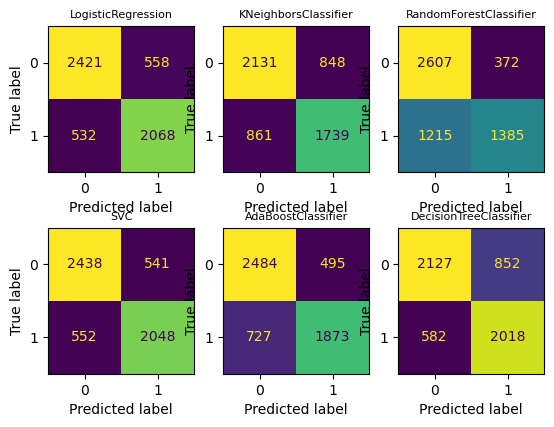

In [34]:
models = [lr, knn, rf, rbf, ada, dtc]
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
for ax_i, model in enumerate(models):
    y_predict = model.predict(X_test)
    axes[ax_i].set_title(type(model).__name__, size=8)
    axes[ax_i] = ConfusionMatrixDisplay.from_predictions(
        y_true=y_test,
        y_pred=y_predict,
        ax=axes[ax_i],
        colorbar=False,
    )

**You can compute other metrics (Precision, Recall, AUC, ...) or create more plots (ROC_AUC, Precision/Recall curve, ...) if you want to.**

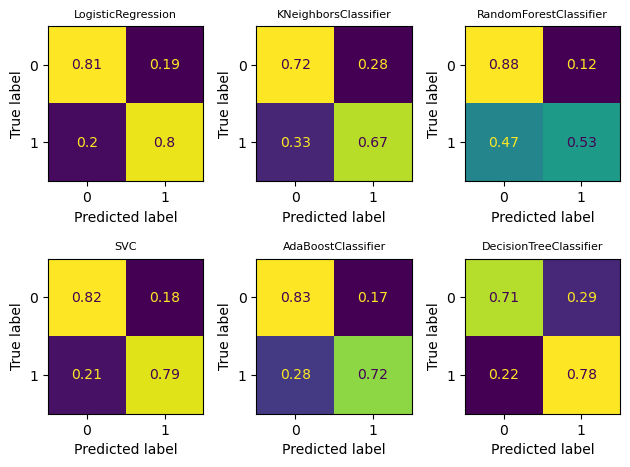

In [44]:
models = [lr, knn, rf, rbf, ada, dtc]
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
for ax_i, model in enumerate(models):
    y_predict = model.predict(X_test)
    axes[ax_i].set_title(type(model).__name__, size=8)
    axes[ax_i] = ConfusionMatrixDisplay.from_predictions(
        y_true=y_test,
        y_pred=y_predict,
        ax=axes[ax_i],
        colorbar=False,
        normalize="true",
    )
plt.tight_layout()

### **2.4 Improve the performance of your models (Bonus)**

In [35]:
# Improve your model
from sklearn.model_selection import GridSearchCV

<u>**Question 10 (Bonus)**</u> <br>
**Try `GridSearchCV` on at least one of the models you tested, to find more optimal hyperparameters** (in terms of f1 score) <br>
**Get the best hyperparameters found by gridsearch (`.best_params_`), as well the best f1 score (`.best_score_`)**

*Note: The optimal parameters are those who improve the f1 score of the model*
- *Use the `scoring='f1'` in `GridSearchCV` to use the F1 score as the metric*
- *Implementing these methods can be very heavy in terms of computing resources, don't select to many hyperparameters to test*
- *Try setting `cv` to 3 to reduce the running time of your code*

In [36]:
rfc = RandomForestClassifier()
# class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *,
# criterion='gini',
# max_depth=None, min_samples_split=2, min_samples_leaf=1,
# min_weight_fraction_leaf=0.0, max_features='sqrt',
# max_leaf_nodes=None, min_impurity_decrease=0.0,
# bootstrap=True, oob_score=False, n_jobs=None, random_state=None,
# verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0,
# max_samples=None, monotonic_cst=None)[source]
parameters = {"max_depth": [1, 3, 5, 7, 9, 11, 13], "min_samples_leaf": [1, 2, 5]}
clf = GridSearchCV(estimator=rfc, param_grid=parameters, cv=3, scoring="f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13],
                         'min_samples_leaf': [1, 2, 5]},
             scoring='f1')

In [37]:
clf.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 13,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [38]:
# Try with a boost classifier
gbc = GradientBoostingClassifier()
# loss="log_loss",
# learning_rate=0.1,
# n_estimators=100,
# subsample=1.0,
# criterion="friedman_mse",
# min_samples_split=2,
# min_samples_leaf=1,
# min_weight_fraction_leaf=0.0,
# max_depth=3,
# min_impurity_decrease=0.0,
# init=None,
# random_state=None,
# max_features=None,
# verbose=0,
# max_leaf_nodes=None,
# warm_start=False,
# validation_fraction=0.1,
# n_iter_no_change=None,
# tol=0.0001,
# ccp_alpha=0.0,
parameters = {
    # "learning_rate": [0.01, 0.01, 0.1, 0.03],
    "max_depth": [3, 5, 7],
    # "loss": ["log_loss", "exponential"],
    "n_estimators": [10, 100, 500],
}
clf = GridSearchCV(estimator=gbc, param_grid=parameters, cv=3, scoring="f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': [10, 100, 500]},
             scoring='f1')

In [39]:
clf.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [40]:
y_predict_best = clf.best_estimator_.predict(X_test)
print(f1_score(y_true=y_train, y_pred=clf.best_estimator_.predict(X_train)))
print(f1_score(y_true=y_test, y_pred=y_predict_best))

0.8208539149997555
0.7867762128325508


<u>**Question 11 (Bonus)**</u> <br>
**Use the gridsearch's best model (`.best_model_`) to predict values for the test set** <br>
**Then, compute the f1 score of the predicted test values**.

**Did gridsearch improve the performance of the model on the test set ? or only on the train set ?**

In [41]:
y_predict_best = clf.best_estimator_.predict(X_test)
print(f1_score(y_true=y_train, y_pred=clf.best_estimator_.predict(X_train)))
print(f1_score(y_true=y_test, y_pred=y_predict_best))

0.8208539149997555
0.7867762128325508


This looks like an overfitting of our model.

### Try to use an [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn)

In [45]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, f1_score

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7],
    #'learning_rate': [0.01, 0.1, 0.2],
    #'subsample': [0.8, 0.9, 1.0],
    #'colsample_bytree': [0.8, 0.9, 1.0],
    #'gamma': [0, 0.1, 0.2],
    #'min_child_weight': [1, 3, 5],
    "max_leaves": [0, 10, 100],
}
xgb = XGBClassifier()
scorer = make_scorer(f1_score)

# Use GridSerach
grid_search = GridSearchCV(
    estimator=xgb, param_grid=param_grid, scoring=scorer, cv=3, verbose=1, n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Evaluate the best model
best_model = grid_search.best_estimator_
f1_train = f1_score(y_train, best_model.predict(X_train))
f1_test = f1_score(y_test, best_model.predict(X_test))
accuracy_score_test = accuracy_score(y_test, best_model.predict(X_test))
print(f"F1 Score (Train): {f1_train:.4f}")
print(f"F1 Score (Test): {f1_test:.4f}")
print(f"Accuracy Score (Test): {accuracy_score_test:.4f}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits


Best parameters: {'max_depth': 3, 'max_leaves': 0, 'n_estimators': 200}
F1 Score (Train): 0.8235
F1 Score (Test): 0.7852
Accuracy Score (Test): 0.8023


In [46]:
type(xgb)

xgboost.sklearn.XGBClassifier

## **3. Explainability with shap**

The `shap` library (SHapley Additive exPlanations) is a Python library used for explaining the output of machine learning models. <br> It provides a unified framework for interpreting complex models and understanding the contributions of individual features to model predictions. <br>

Shap is particularly useful for understanding black-box models like boosting, random forests, and deep neural networks, among others. <br>
It can also be used with any classification model.

**Let's install and import the shap library.**

In [ ]:
#!pip install shap

In [49]:
import shap

Shap is very heavy and takes a long time to compute. <br>
To facilitate execution and reduce computing time, we'll work on the **first 100 rows only**.

*Note: You can use either the train features (X_train) or the test features (X_test) to compute shap values*

**<u>Question 10</u>**: <br>
**Create an object `explainer` that can compute shap values.** <br>

*<u>Help</u>: You can use `shap.Explainer` for any trained classification model as input.* <br>
*For tree based models, you can use `shap.TreeExplainer`*.


In [57]:
# xpl = shap.TreeExplainer(grid_search.best_estimator_)
xpl = shap.Explainer(grid_search.best_estimator_)

**Now, compute the shap values of a model with `explainer.shap_values`.** <br>
If it takes too much time, you can reduce to 100-500 values.

In [58]:
shap_values = xpl.shap_values(X_test[:500], y_predict_best[:500])
shap_values.shape

(500, 36)

**<u>Question 11:</u>** <br>
**Display the summary plot of shap values with `shap.summary_plot(...., plot_type=bar)`.**

*Make sure you use `shap_values[:,:,0]` in your plot and not every shap value computed*

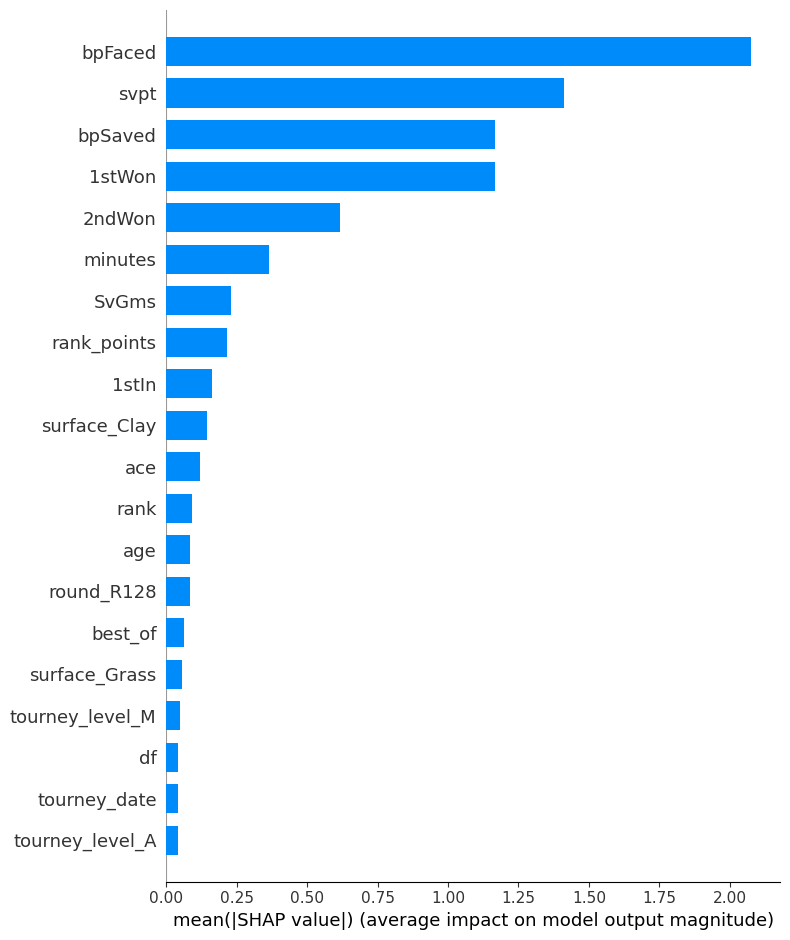

In [59]:
shap.summary_plot(shap_values, feature_names=X_train.columns, plot_type="bar")

**<u>Question 12</u>**: <br>
**Use the same shap plot as previously but replace `plot_type="bar"` with `plot_type="dot"`.** <br>
**And add the data you used to compute shap_values in `features=...`.**

**Explain what you have understood about this plot**:
- **Which variables are important in terms of explainability ?**
- **How does the values of the important variables affect predictions ?**

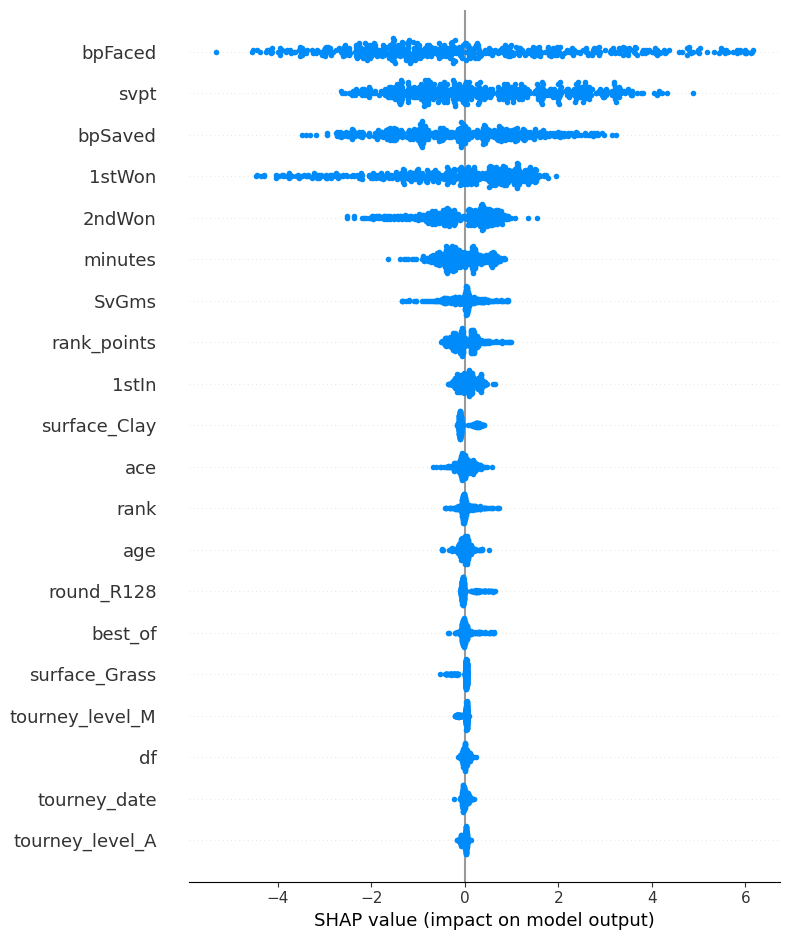

In [68]:
sum_plt = shap.summary_plot(shap_values, feature_names=X_train.columns, plot_type="dot")

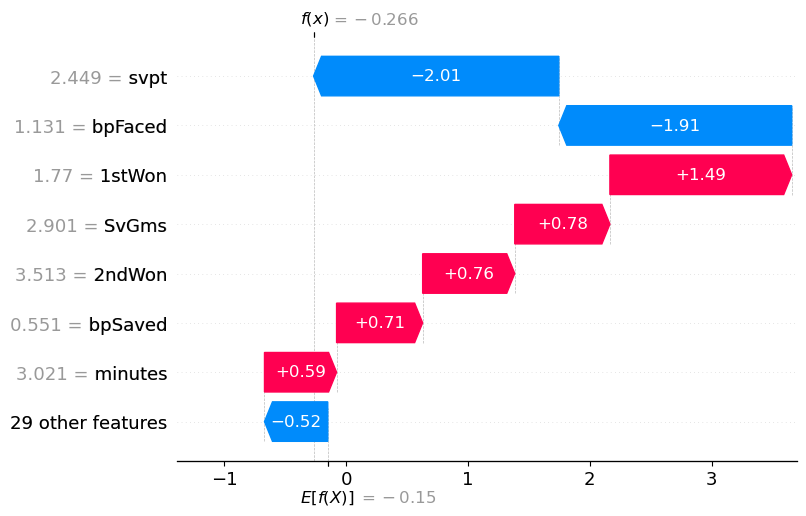

In [75]:
shap.plots.waterfall(xpl(X_test)[0], max_display=8)

Features wich variability influes the most on the prediction are displayed on top.

## Try to train a other model with only the 7 more important vars

In [77]:
main_features = ["svpt", "bpFaced", "1stWon", "SvGms", "2ndWon", "bpSaved", "minutes"]
X_sub_train = X_train[main_features]
X_sub_test = X_test[main_features]
X_sub_test.head()

,svpt,bpFaced,1stWon,SvGms,2ndWon,bpSaved,minutes
0,2.449036,1.131421,1.769699,2.901362,3.513372,0.550954,3.020855
1,0.128727,0.015483,0.227867,-0.159422,-0.810879,-0.060429,0.186987
2,1.527736,1.131421,1.138950,1.488693,0.630538,0.245263,1.264325
3,0.742926,-0.430892,0.648366,1.017803,1.062963,-0.671812,0.678816
4,4.155145,2.024170,4.923448,4.314031,2.936805,2.690795,3.208218


In [84]:
# Train a simpler logistic regression model
lr_sub = LogisticRegression()
lr_sub.fit(X_sub_train, y_train)

y_predict_lr = lr_sub.predict(X_sub_test)
print(f"accuracy= {accuracy_score(y_true=y_test, y_pred=y_predict_lr):.3f}")
print(f"f1_score= {f1_score(y_true=y_test, y_pred=y_predict_lr):.3f}")


accuracy= 0.801
f1_score= 0.788


In [82]:
# Train a xgboost model
xgb_sub = XGBClassifier()
xgb_sub.fit(X_sub_train, y_train)

y_predict_xgb = xgb_sub.predict(X_sub_test)
print("accuracy= ", accuracy_score(y_true=y_test, y_pred=y_predict_xgb))
print("f1_socre= ", f1_score(y_true=y_test, y_pred=y_predict_xgb))

accuracy=  0.7895680229431797
f1_socre=  0.7724806201550387


> Same results than the ones get with the whole dataset !!!

## **4. Deep Learning (Bonus)**

We will start by importing one of Python's Deep Learning libraries `tensorflow`/`keras`.

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

In the following cells, `dataset` should be the dataset you transformed with data pre-processing (Onehotencoded, LabelEncoder,...). <br>
You should run the following cells to prepare the data to train a Deep Learning model.

**Question 14 (Bonus)** <br>
**Make a small neural network model using `tensorflow`/`keras`, and print the accuracy**

*Note: You can use the following elements to train the neural network* <br>
- *`tf.keras.Sequential`*
- *`layers.Dense(INTEGER, activation='relu')`*,
- *`tf.keras.losses.BinaryCrossentropy`*
- *`model.compile(optimizer='adam', ...)`*
- *`model.fit`*
- *`model.evaluate`* with epoch ~= 10

In [ ]:
dataset = X_train
dataset.head()

,age,ace,df,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced,rank,rank_points,draw_size,tourney_date,best_of,minutes,hand_L,hand_R,hand_U,surface_Carpet,surface_Clay,surface_Grass,surface_Hard,tourney_level_A,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
0,1.577909,-0.593506,-0.842254,-1.372650,-1.203821,-1.313966,-0.522596,-1.101201,-1.283195,-1.323641,-0.136650,-0.411463,-0.673564,-0.786235,-0.498333,-0.866930,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.094875,0.841111,-0.028958,0.196971,-0.528266,-0.332800,1.639530,0.546913,1.162337,0.908233,-0.019066,-0.396076,-0.673564,0.338816,-0.498333,0.678816,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.377976,-0.055524,-0.435606,0.538193,0.407119,0.718450,1.495388,1.253248,-0.060429,-0.207704,-0.050422,-0.465911,1.628614,-0.223709,2.006691,0.491452,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.292003,-0.772833,-1.248902,-0.348984,0.199256,-0.402883,-0.666738,0.076023,-0.366120,0.238671,0.035806,-0.513849,-0.673564,-0.223709,-0.498333,-0.117478,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.463949,-0.055524,-0.028958,0.845293,0.043358,-0.122550,2.071955,1.017803,0.245263,0.461858,-0.442368,-0.084186,1.628614,-0.223709,2.006691,0.304089,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# Define the model
model = Sequential(
    [
        Dense(64, activation="relu"),  # Input
        Dense(32, activation="relu"),  # Hiden
        Dense(1, activation="relu"),  # Output
    ]
)
model.compile(
    optimizer=Adam(), loss=tf.keras.losses.BinaryCrossentropy(), metrics=["accuracy"]
)

# Train the model
model.fit(X_train, y_train, epochs=10)

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model performances: {loss=:.3f} {accuracy=:.3f}")

Epoch 1/10
698/698 ━━━━━━━━━━━━━━━━━━━━ 2s 819us/step - accuracy: 0.5842 - loss: 1.1725
Epoch 2/10
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 771us/step - accuracy: 0.6930 - loss: 0.6621
Epoch 3/10
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 793us/step - accuracy: 0.7600 - loss: 0.5306
Epoch 4/10
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step - accuracy: 0.7547 - loss: 0.4958
Epoch 5/10
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 786us/step - accuracy: 0.7703 - loss: 0.4703
Epoch 6/10
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step - accuracy: 0.7874 - loss: 0.4497
Epoch 7/10
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step - accuracy: 0.7869 - loss: 0.4558
Epoch 8/10
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 835us/step - accuracy: 0.7828 - loss: 0.4467
Epoch 9/10
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 786us/step - accuracy: 0.7915 - loss: 0.4434
Epoch 10/10
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 802us/step - accuracy: 0.7938 - loss: 0.4355
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - accuracy: 0.8005 - loss: 0.4774
Model performances: loss=0.486 accuracy=0.

In [ ]:
# Define the model
model = Sequential(
    [
        Dense(32, activation="relu"),  # Input
        Dense(16, activation="relu"),  # Hidden
        Dense(1, activation="sigmoid"),  # Output
    ]
)
model.compile(
    optimizer=Adam(), loss=tf.keras.losses.BinaryCrossentropy(), metrics=["accuracy"]
)

# Train the model
model.fit(X_train, y_train, epochs=20)

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model performances: {loss=:.3f} {accuracy=:.3f}")

Epoch 1/20
698/698 ━━━━━━━━━━━━━━━━━━━━ 2s 820us/step - accuracy: 0.6632 - loss: 0.5887
Epoch 2/20
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 806us/step - accuracy: 0.7981 - loss: 0.4108
Epoch 3/20
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 773us/step - accuracy: 0.8016 - loss: 0.3904
Epoch 4/20
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 776us/step - accuracy: 0.8037 - loss: 0.3870
Epoch 5/20
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 782us/step - accuracy: 0.8070 - loss: 0.3829
Epoch 6/20
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 793us/step - accuracy: 0.8057 - loss: 0.3820
Epoch 7/20
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 770us/step - accuracy: 0.8143 - loss: 0.3771
Epoch 8/20
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step - accuracy: 0.8093 - loss: 0.3783
Epoch 9/20
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 844us/step - accuracy: 0.8118 - loss: 0.3725
Epoch 10/20
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 782us/step - accuracy: 0.8117 - loss: 0.3751
Epoch 11/20
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 893us/step - accuracy: 0.8102 - loss: 0.3753
Epoch 12/20
698/698 ━━━━━━━━━━

## Success with 80.1% accuracy 🎉